# Import Libraries

In [2]:
!pip show tensorflow 
!pip show keras

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [1]:
!pip install tensorflow
!pip install keras

^C


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd


# Split

In [4]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Plot

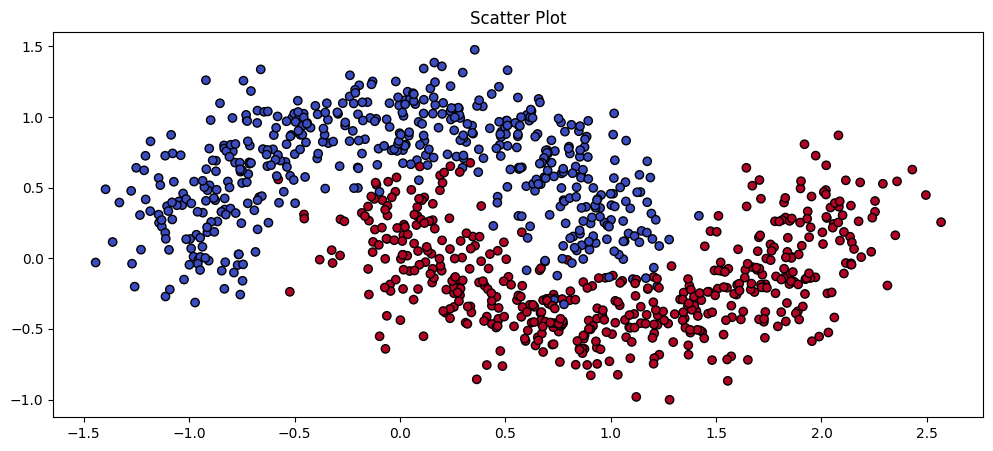

In [5]:
# Plot the noisy data
plt.figure(figsize=(12, 5))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title(f'Scatter Plot')
plt.show()

# Logistic Regression

In [6]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

# Predict

In [7]:
y_pred= lg.predict(X_test)

# Evaluate

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8467
Precision: 0.8581
Recall: 0.8471
F1 Score: 0.8526
Confusion Matrix:
[[121  22]
 [ 24 133]]


In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       143
           1       0.86      0.85      0.85       157

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# WTS and Bias

# Plot

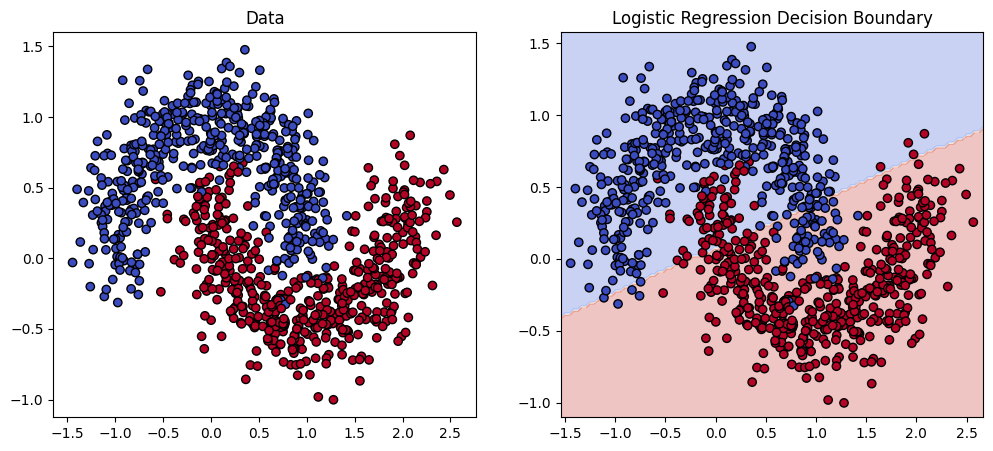

In [10]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for Logistic Regression
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))
Z = lg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()


# Build Neural Network

In [11]:
X_train.shape[1]

2

In [12]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
18/18 [==============================] - 4s 37ms/step - loss: 0.5681 - accuracy: 0.8625 - val_loss: 0.5045 - val_accuracy: 0.8214
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 0.4037 - accuracy: 0.8571 - val_loss: 0.3986 - val_accuracy: 0.8357
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.3076 - accuracy: 0.8768 - val_loss: 0.3669 - val_accuracy: 0.8357
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 0.2767 - accuracy: 0.8750 - val_loss: 0.3522 - val_accuracy: 0.8429
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.2593 - accuracy: 0.8875 - val_loss: 0.3430 - val_accuracy: 0.8429
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.2511 - accuracy: 0.8839 - val_loss: 0.3329 - val_accuracy: 0.8500
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 0.2443 - accuracy: 0.8857 - val_loss: 0.3252 - val_accuracy: 0.8500
Epoch 8/20
18/18 [

# Plot

In [15]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

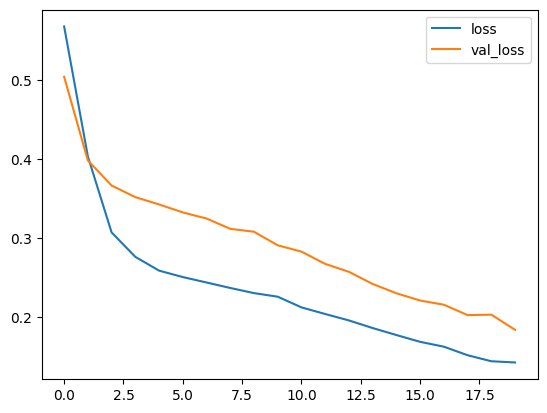

In [16]:
metrics[['loss','val_loss']].plot()

<Axes: >

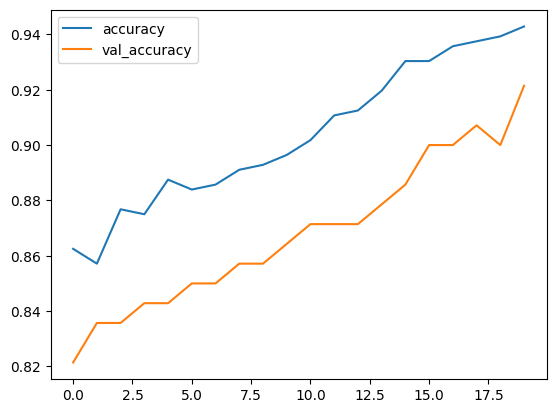

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

# Predict

In [18]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


10/10 [==============================] - 0s 3ms/step


In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9300
Precision: 0.9198
Recall: 0.9490
F1 Score: 0.9342
Confusion Matrix:
[[130  13]
 [  8 149]]


In [20]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       143
           1       0.92      0.95      0.93       157

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Plot

313/313 [==============================] - 1s 4ms/step


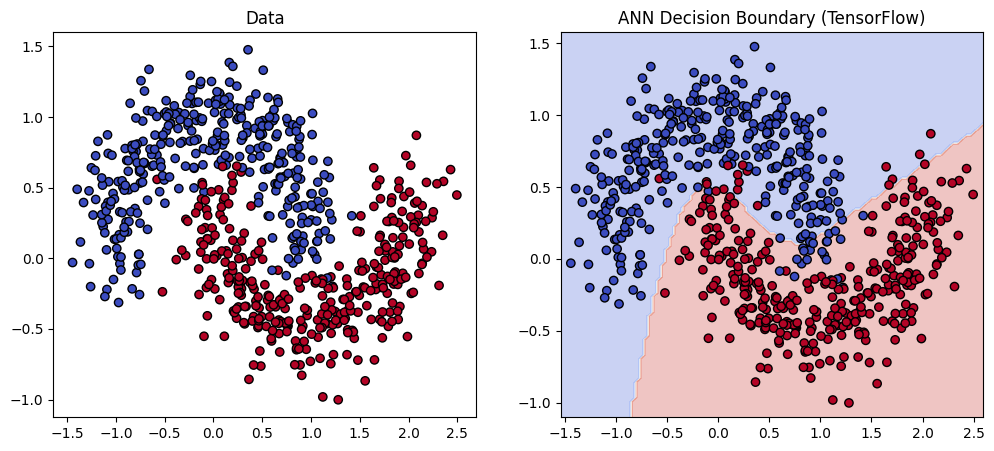

In [21]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1, 100),
                     np.linspace(X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()


# Test

313/313 [==============================] - 1s 4ms/step


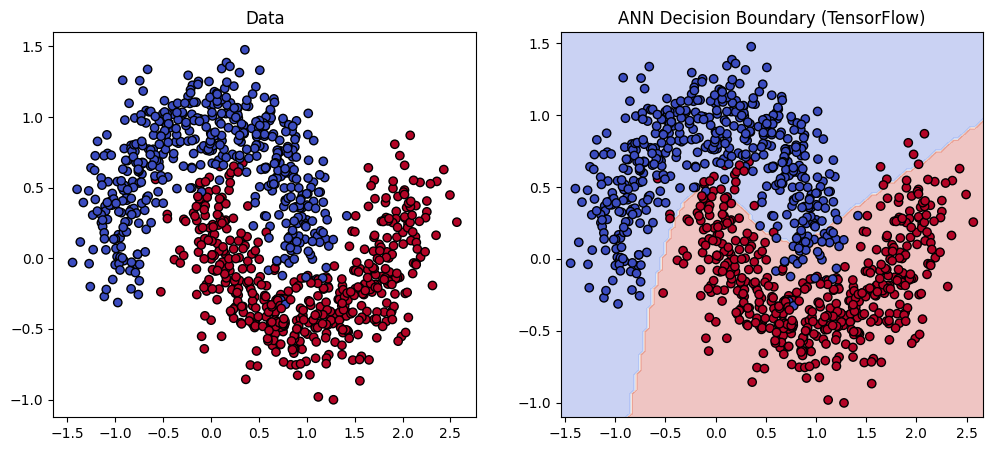

In [22]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()
